In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_corr_mtx import *
import networkx as nx
import numpy as np
import pandas as pd
import community as community_louvain
import json

# auto reload helper_corr_mtx
%load_ext autoreload

# 3. Read the data and plot them

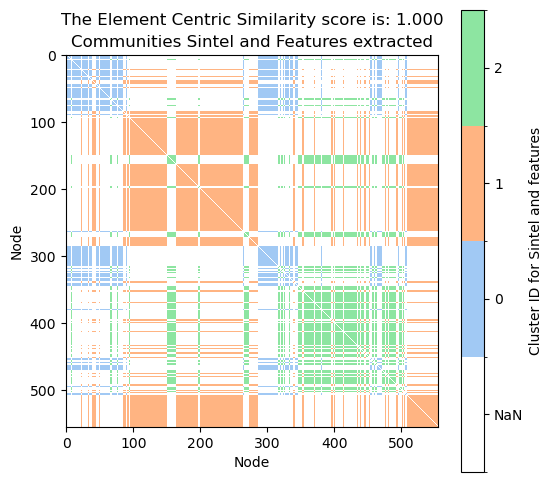

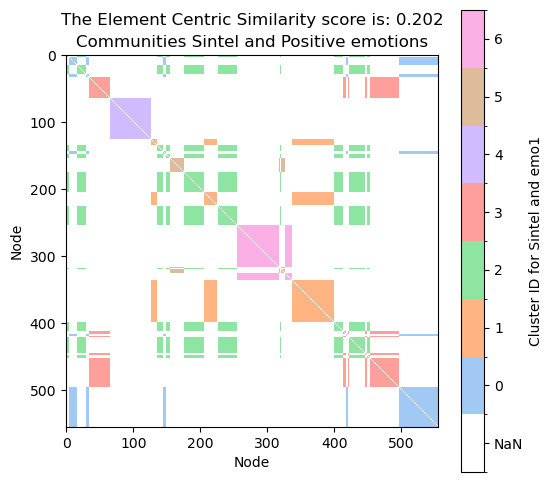

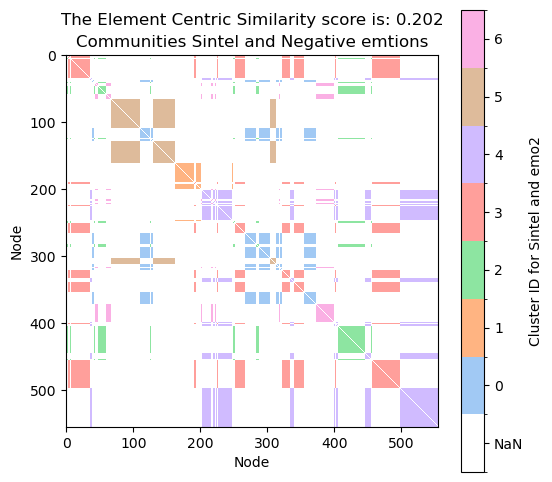

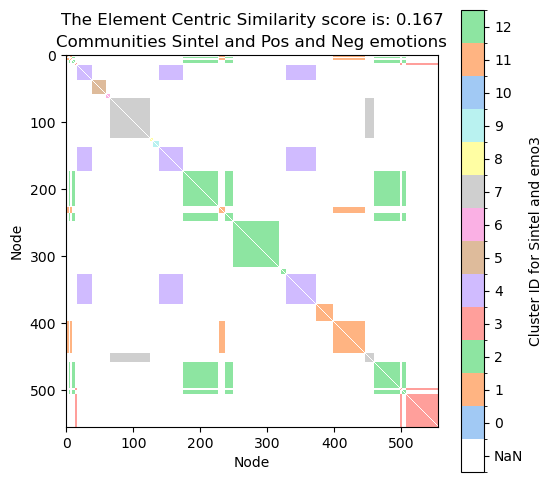

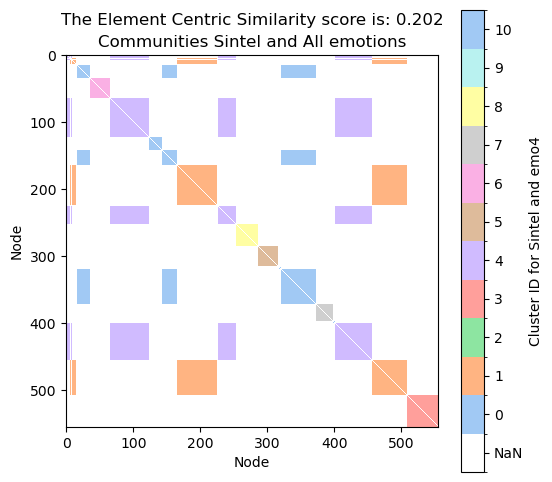

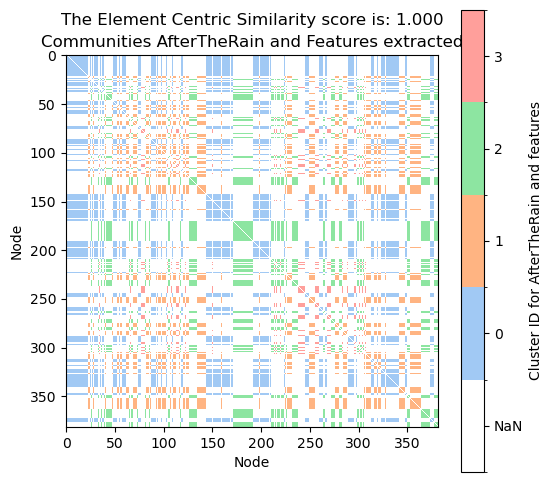

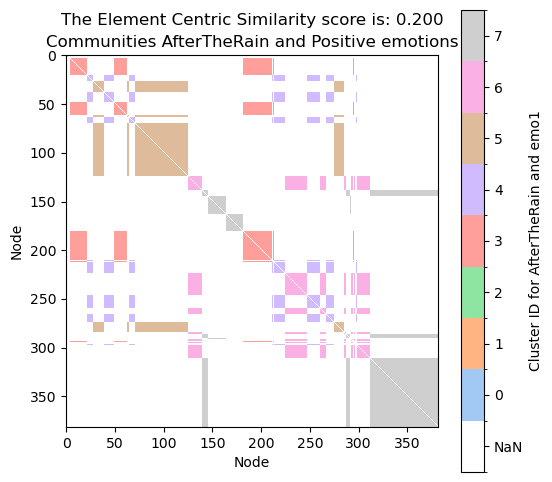

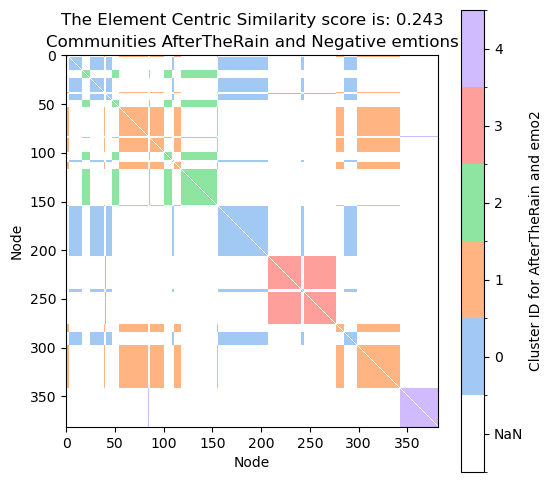

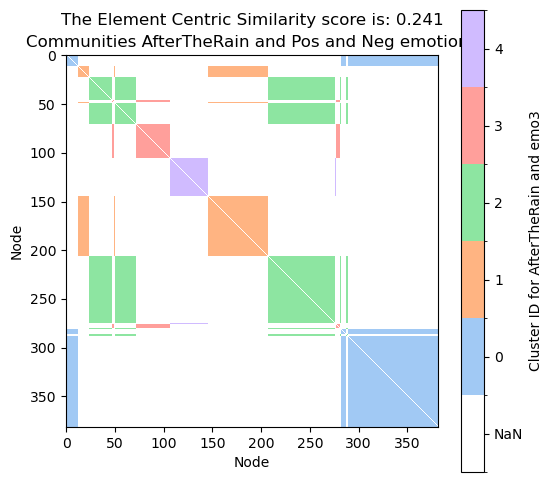

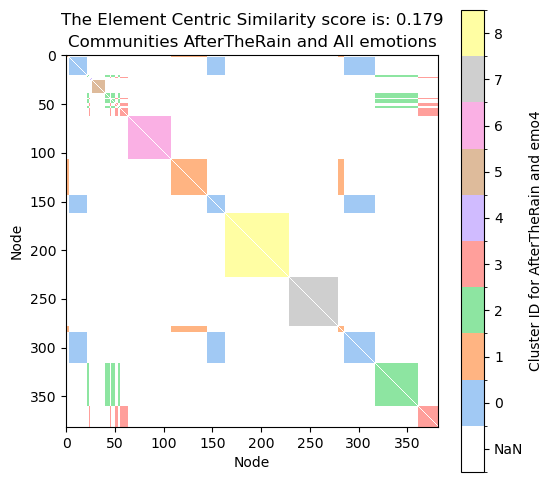

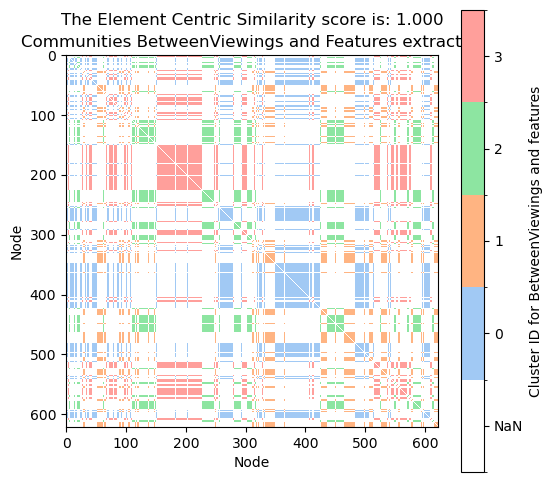

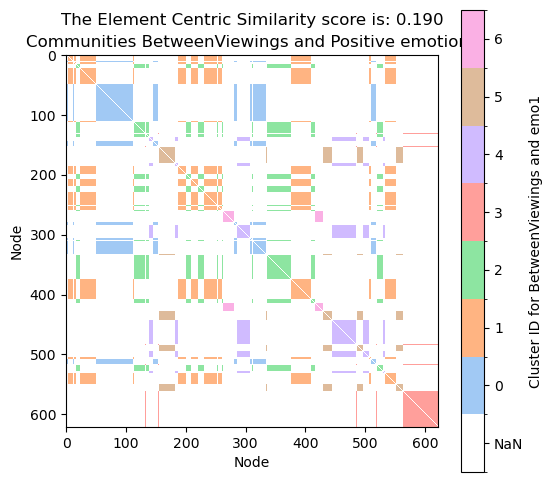

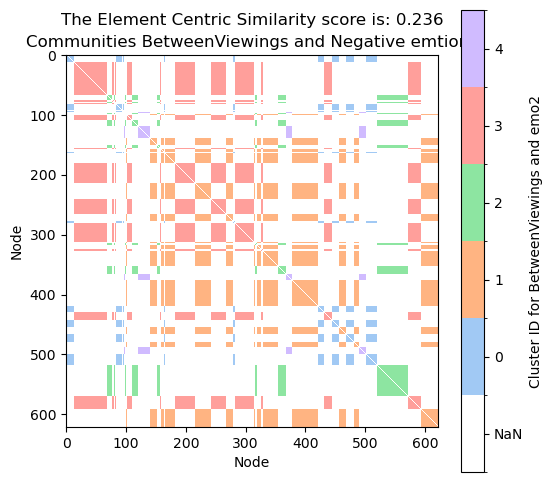

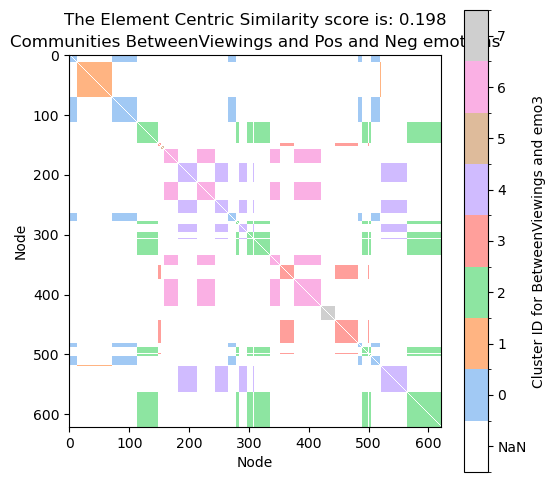

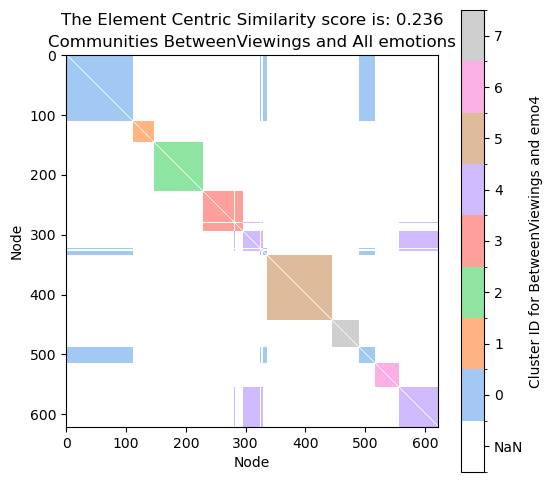

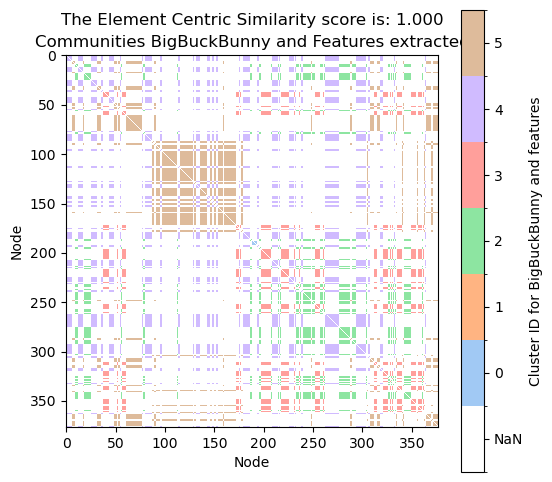

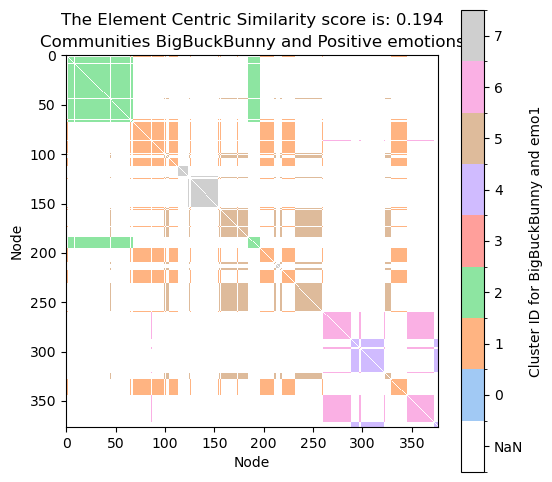

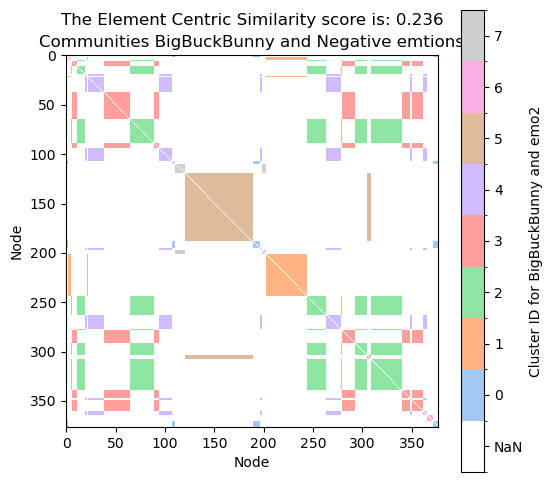

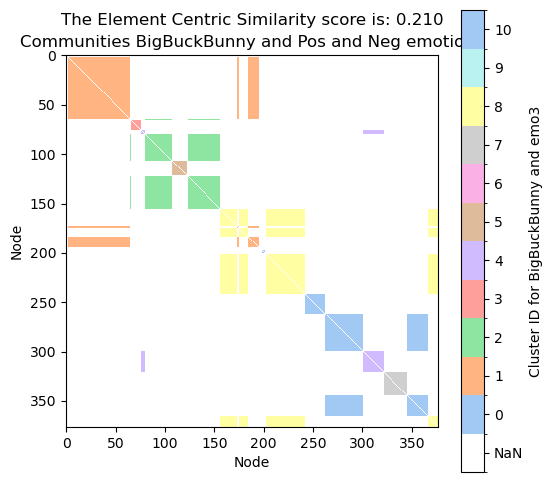

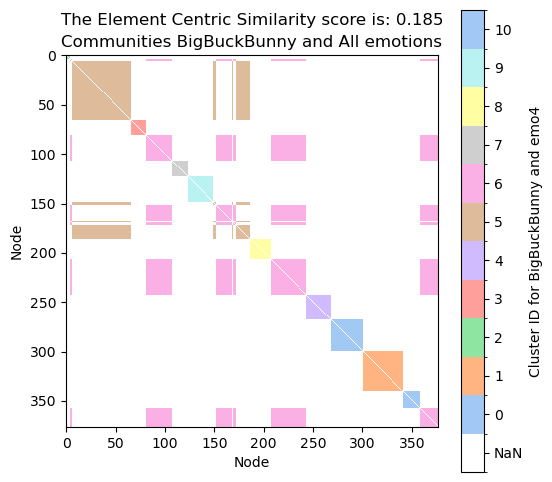

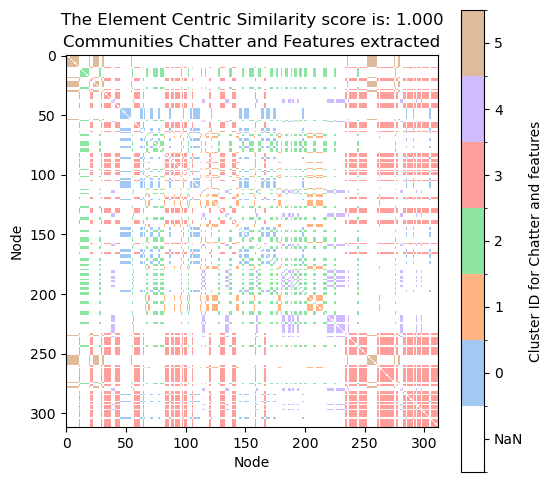

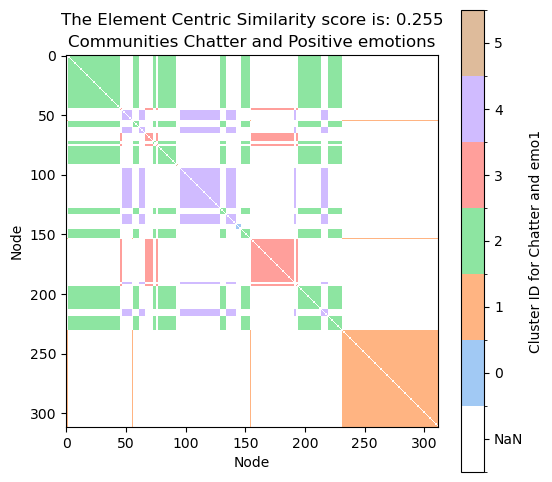

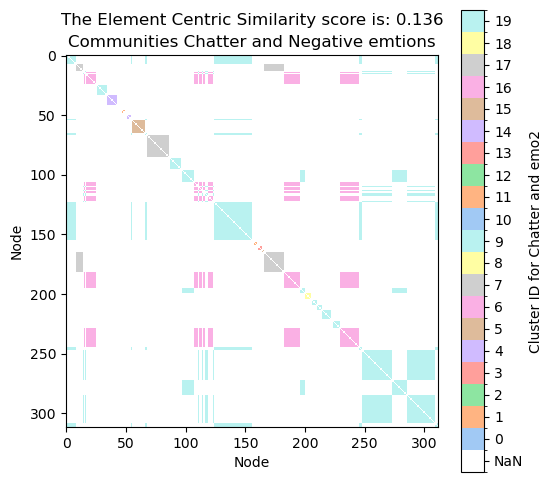

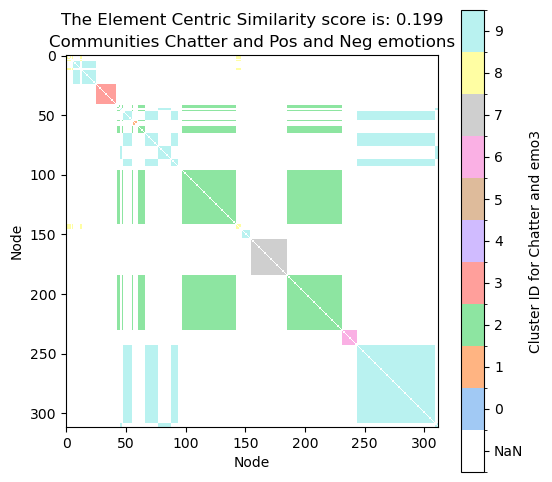

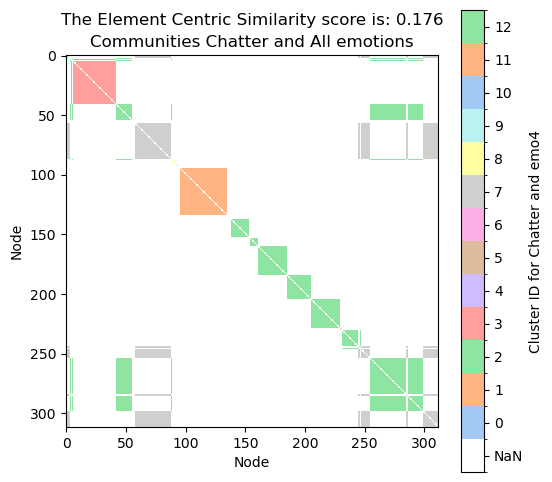

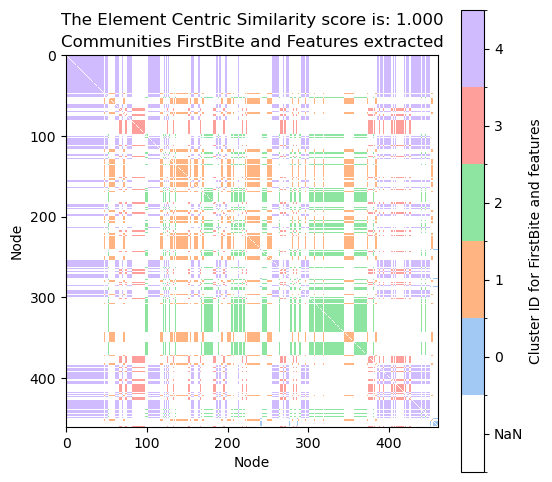

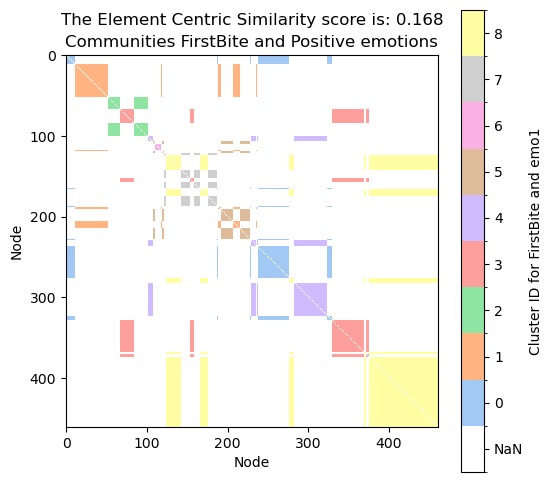

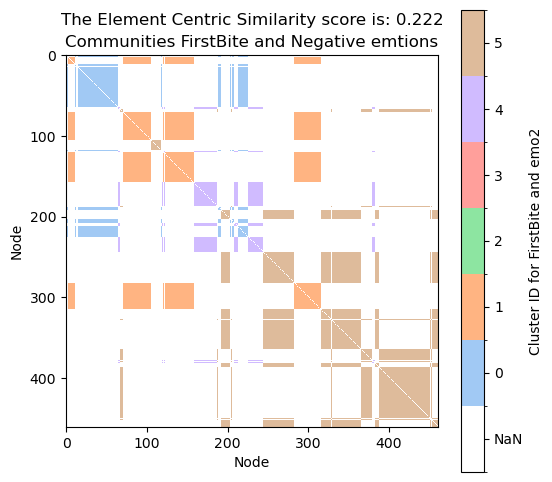

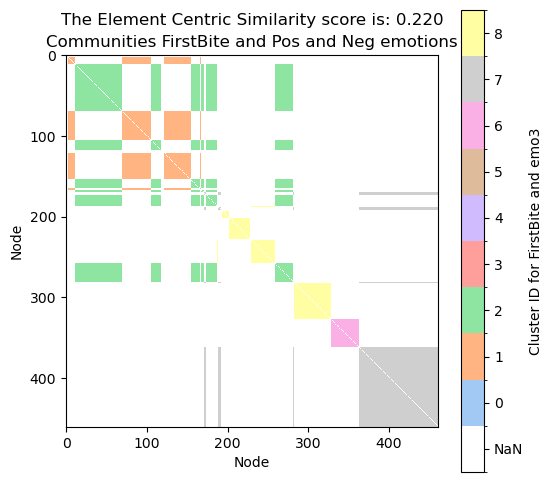

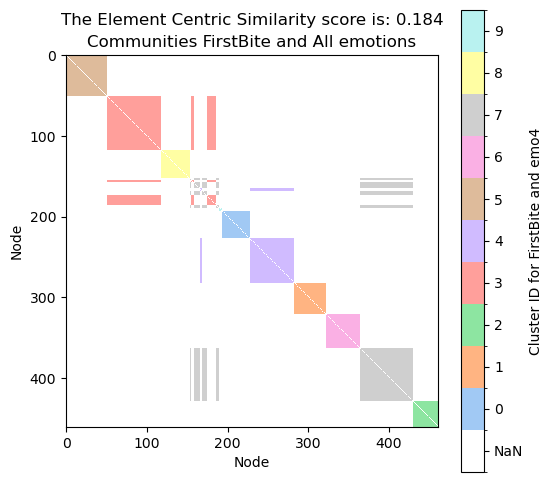

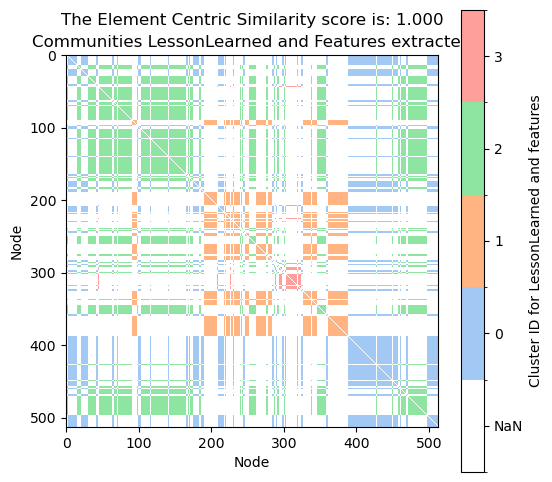

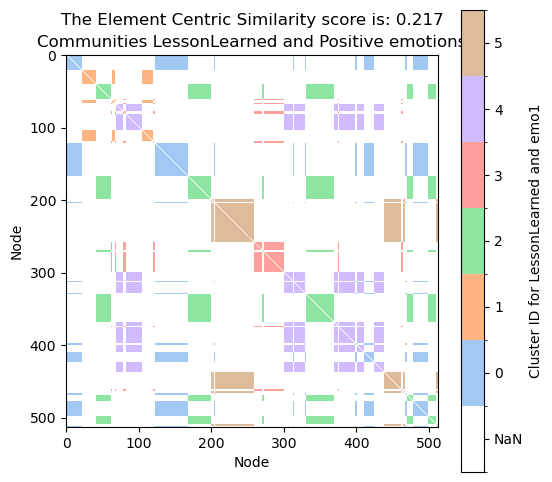

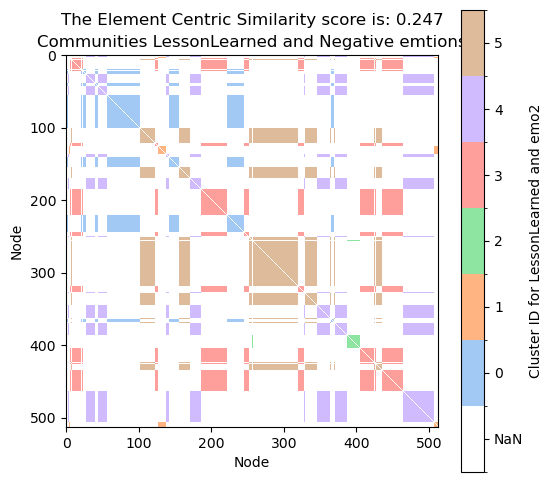

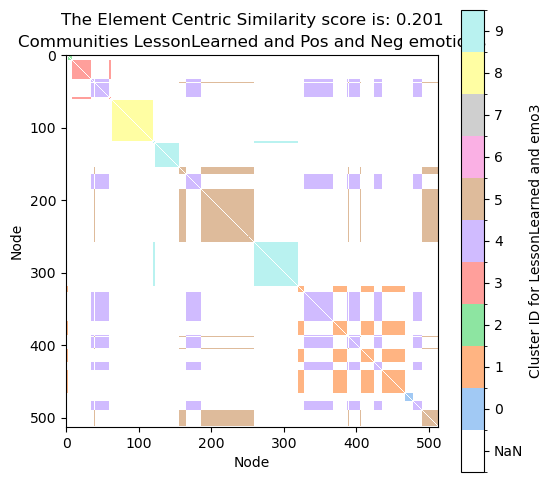

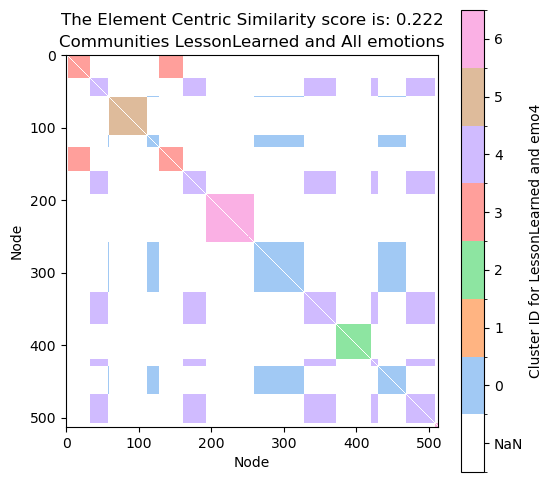

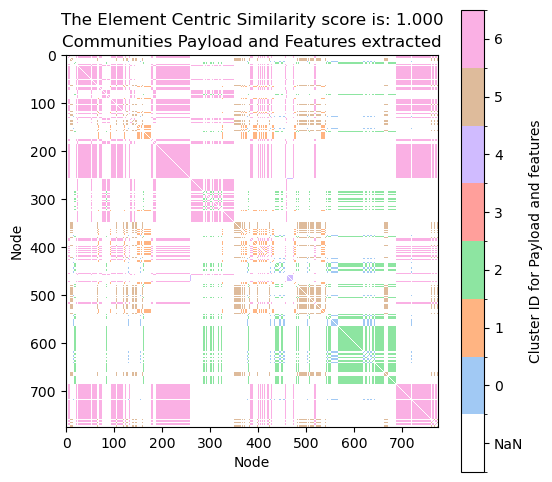

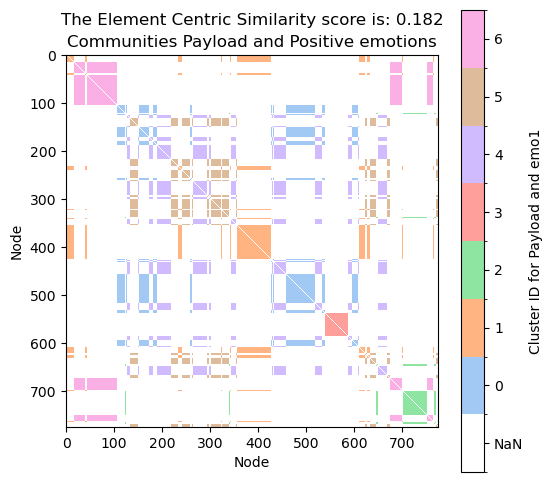

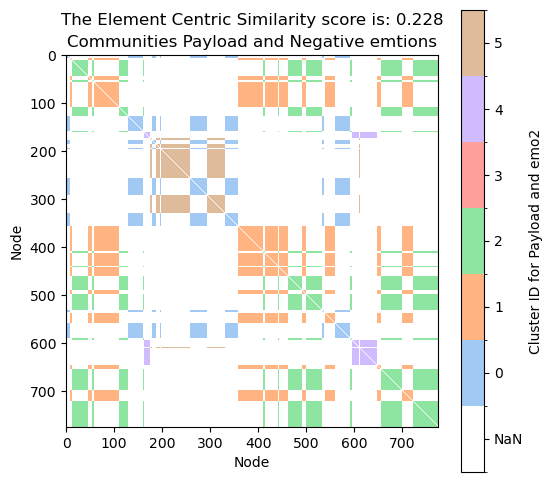

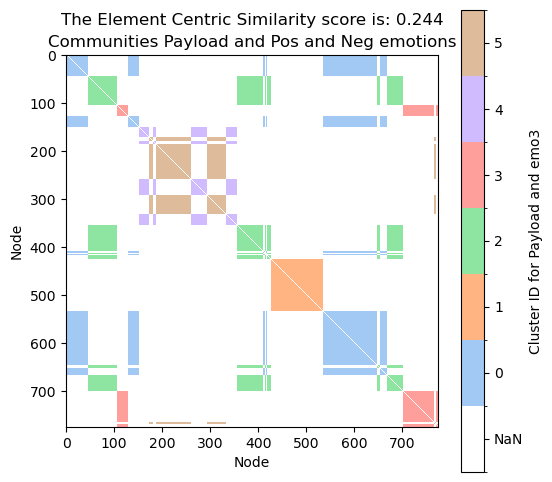

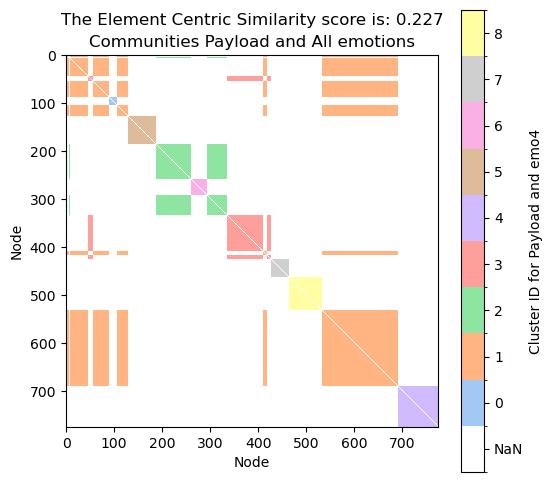

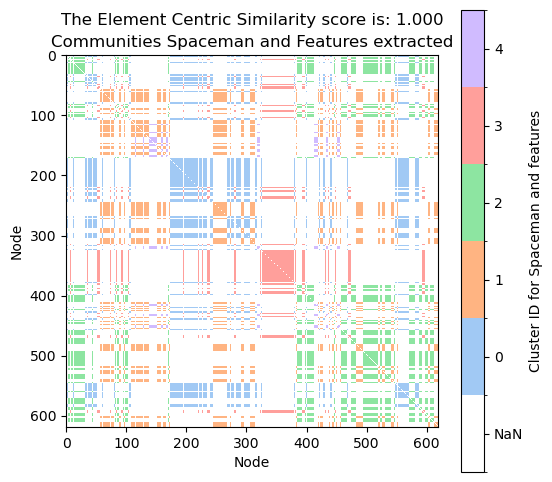

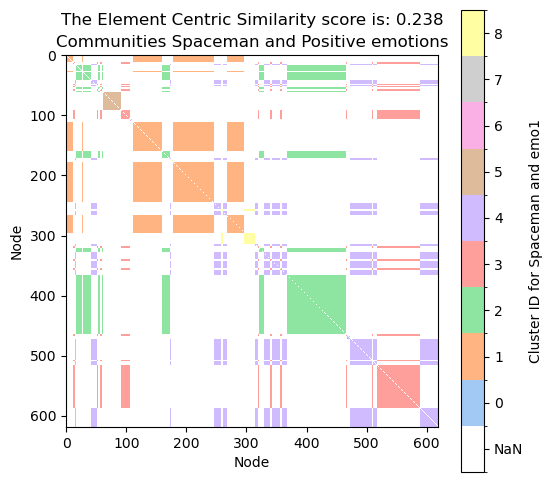

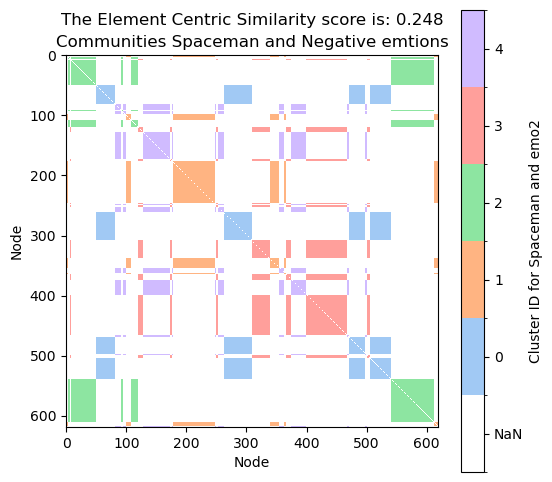

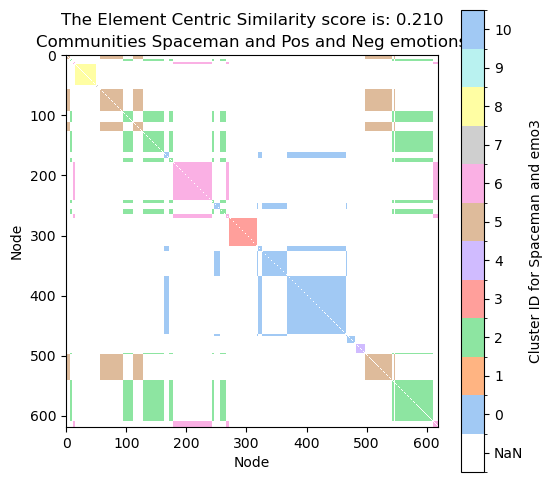

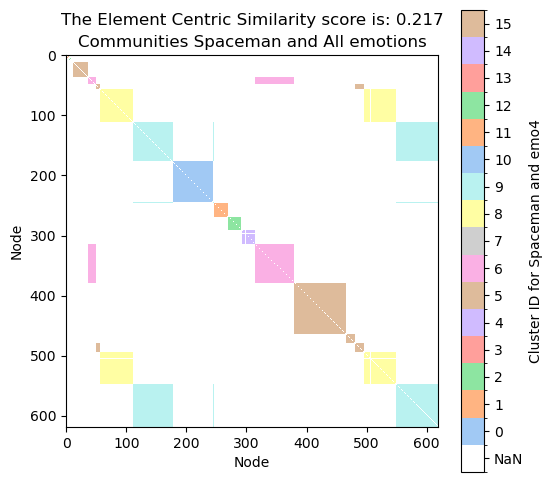

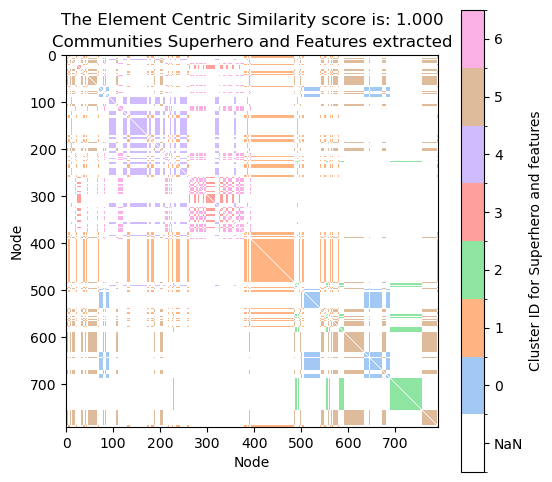

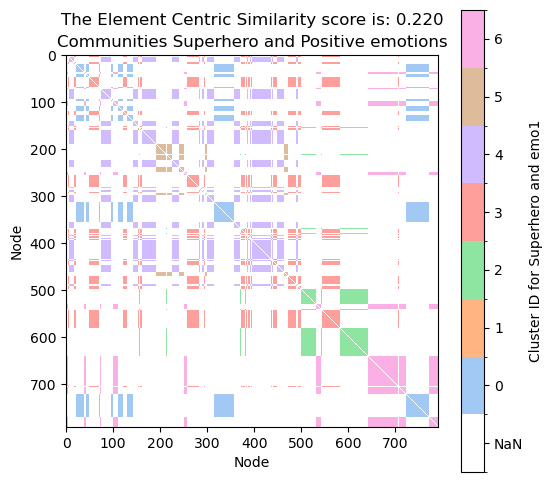

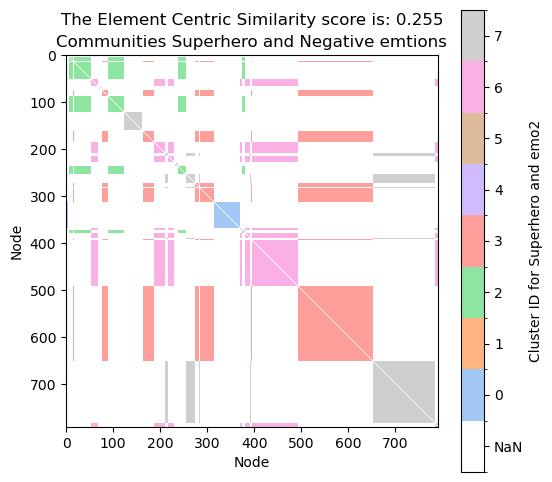

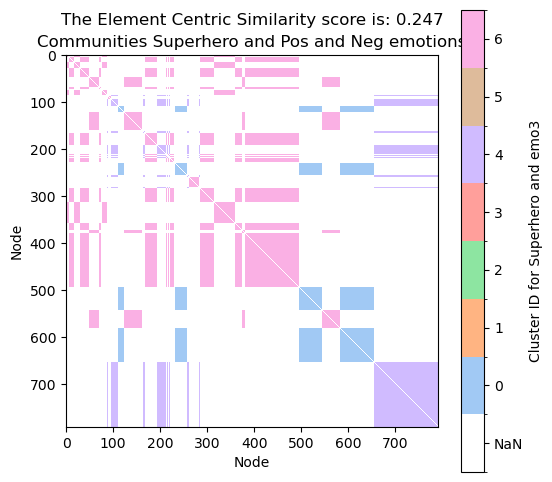

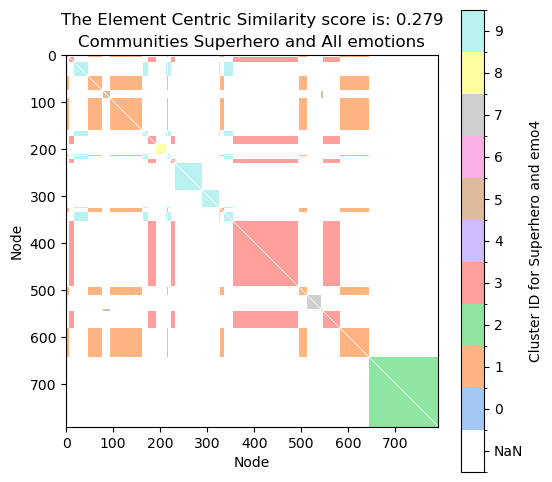

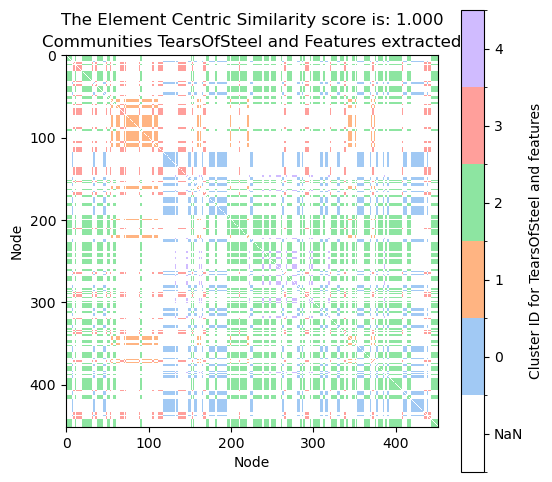

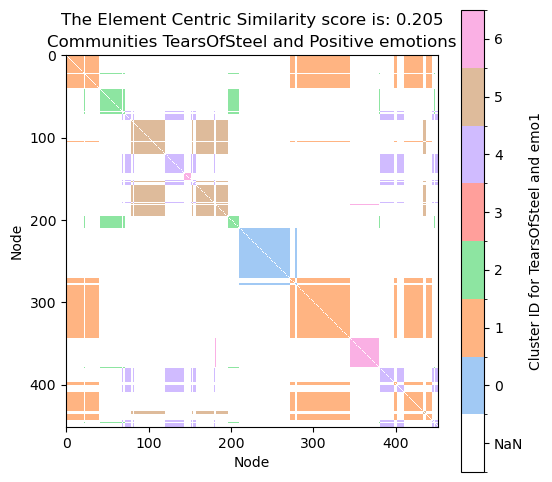

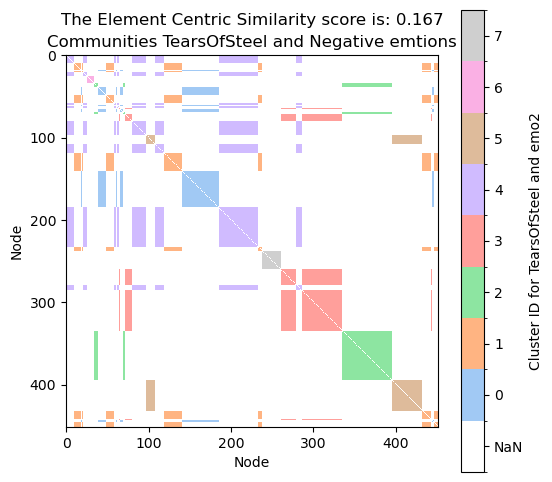

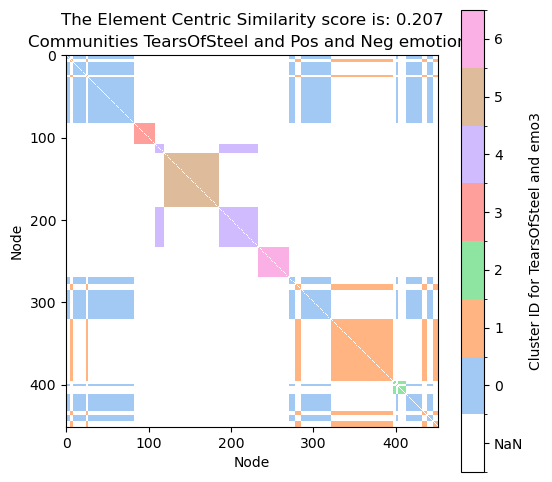

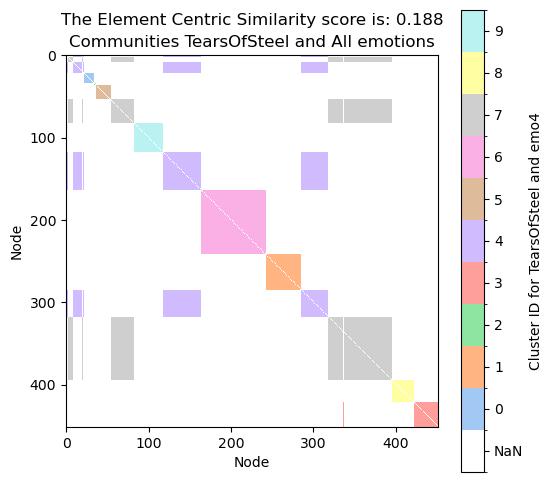

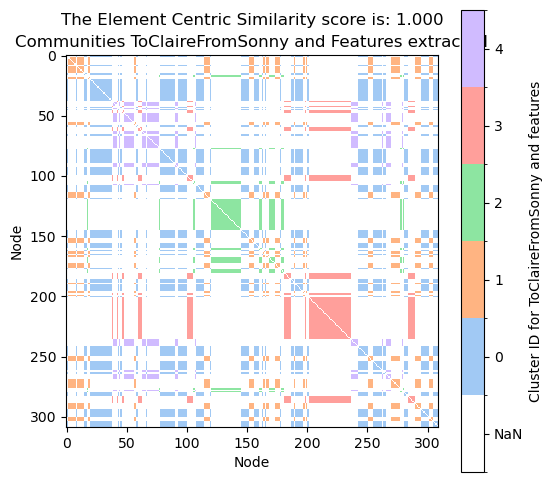

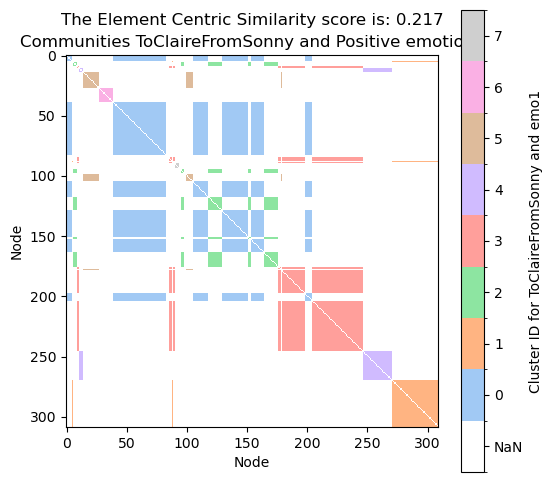

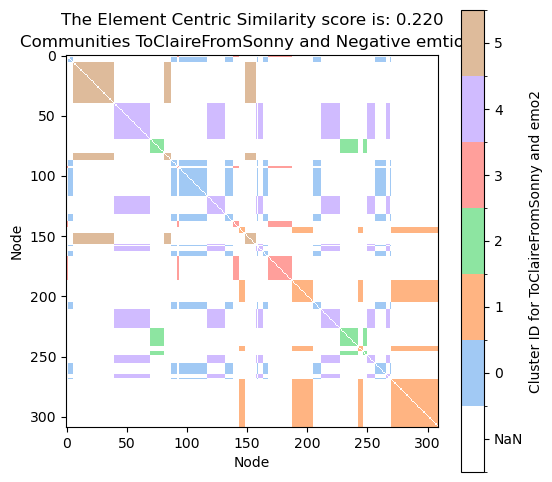

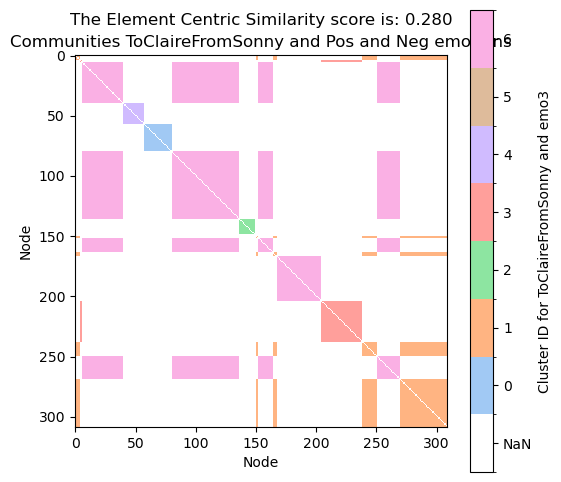

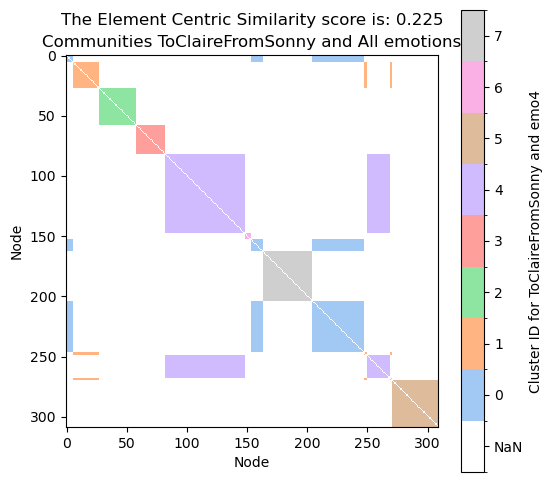

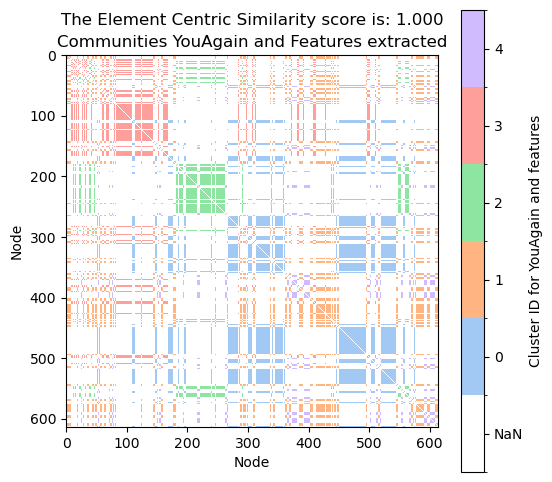

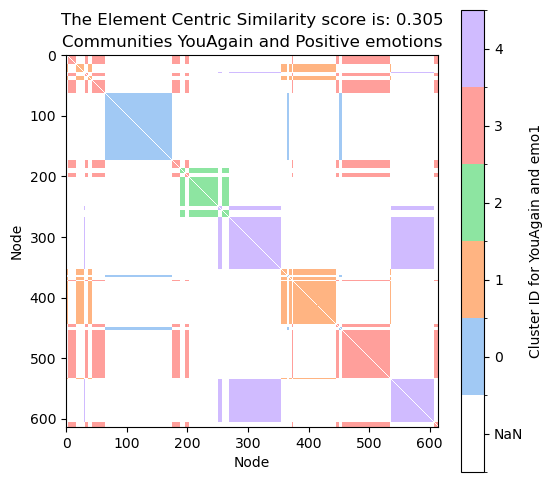

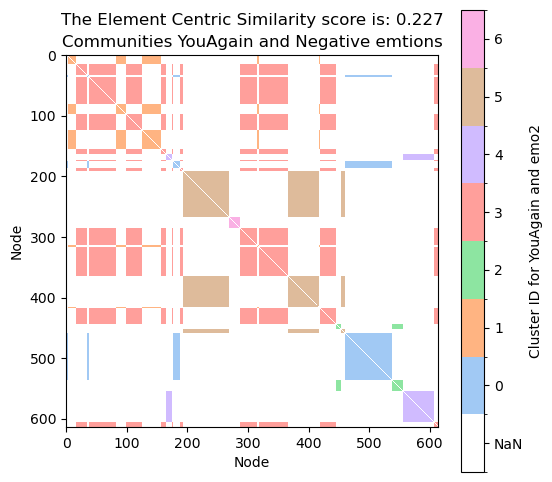

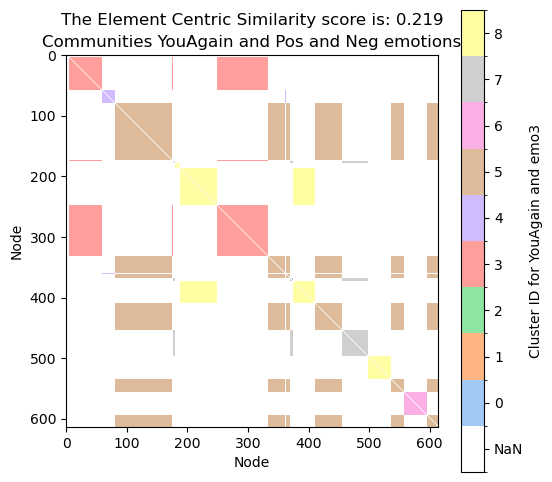

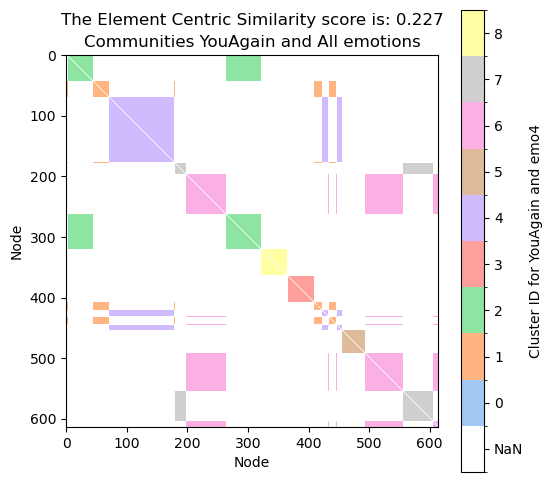

In [3]:
types = ['features', 'emo1', 'emo2', 'emo3', 'emo4']
movies = ['Sintel', 'AfterTheRain', 'BetweenViewings', 'BigBuckBunny', 'Chatter', 'FirstBite', 'LessonLearned', 'Payload',
          'Spaceman', 'Superhero', 'TearsOfSteel', 'ToClaireFromSonny', 'YouAgain']

for movie in movies:
    sim_mtx = pd.read_csv(f'/Users/silviaromanato/Desktop/SEMESTER_PROJECT/Material/Output/louvain/{movie}_sim_mtx.csv', header = None)[0]
    for i, type in enumerate(types):
        with open(f'/Users/silviaromanato/Desktop/SEMESTER_PROJECT/Material/Output/louvain/{movie}_clusters_{type}.json') as json_file:
            cluster_feat = json.load(json_file)

        sim_score = sim_mtx[i]

        plot_cluster_matrix(cluster_feat, sim_score, movie, type)

In [27]:
method = 'bold'
method.upper()

'BOLD'

In [16]:
df = pd.DataFrame(columns = ['Movie', 'Sim Score', 'Type'])

for movie in movies:
    sim_mtx = pd.read_csv(f'/Users/silviaromanato/Desktop/SEMESTER_PROJECT/Material/Output/louvain/{movie}_sim_mtx.csv', header = None)[0]
    type = ['Postive', 'Negative', 'Pos Neg', 'All']
    movie = movie
    df_single = pd.DataFrame({'Movie': movie, 'Sim Score': sim_mtx[1:], 'Type': type})

    # concatenate all dataframes
    df = pd.concat([df, df_single])


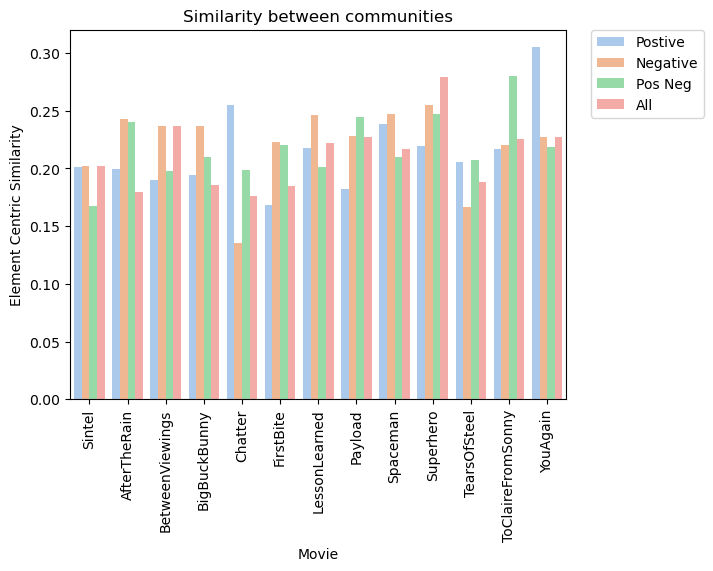

In [26]:
# create a barplot 
palette = sns.color_palette("pastel")
sns.barplot(x = 'Movie', y = 'Sim Score', hue = 'Type', data = df, palette = palette)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# the y axis is the similarity score: Element Centric Similarity
plt.ylabel('Element Centric Similarity')
plt.title('Similarity between communities')
plt.show()
